In [ ]:
#@title
!pip install matplotlib pandas

Dropdown(description='Select Crypto:', options=('bitcoin', 'ethereum', 'litecoin', 'dogecoin'), value='bitcoin…

Button(description='Get Price and Plot', style=ButtonStyle())

The current price of bitcoin is $25917


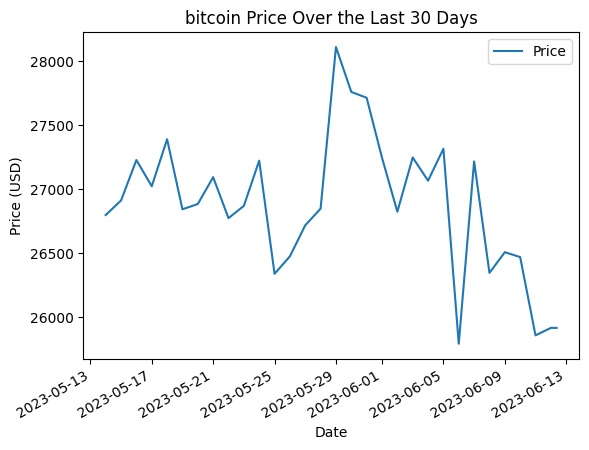

In [9]:
import requests
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt

def get_crypto_price(coin):
#CoinGecko API

    url = f"https://api.coingecko.com/api/v3/simple/price?ids={coin}&vs_currencies=usd"
    response = requests.get(url)
    price = response.json()[coin]['usd']
    return price

def get_crypto_price_history(coin):
    url = f"https://api.coingecko.com/api/v3/coins/{coin}/market_chart?vs_currency=usd&days=30&interval=daily"
    response = requests.get(url)
    prices = response.json()['prices']
    return prices

def plot_price_history(prices, coin):
    # Convert timestamp to date and price to USD
    data = [[pd.to_datetime(p[0], unit='ms'), p[1]] for p in prices]
    
    # Create a DataFrame and plot
    df = pd.DataFrame(data, columns=['Date', 'Price'])
    df.plot(x='Date', y='Price', kind='line')
    plt.title(f"{coin} Price Over the Last 30 Days")
    plt.ylabel("Price (USD)")
    plt.show()


display(dropdown)
display(button)

def on_button_clicked(b):
    clear_output(wait=True)
    display(dropdown)
    display(button)
    coin = dropdown.value
    try:
        price = get_crypto_price(coin)
        print(f"The current price of {coin} is ${price}")
        prices = get_crypto_price_history(coin)
        plot_price_history(prices, coin)
    except:
        print("Sorry, I can't get the information for that cryptocurrency. Please try again.")

# List of cryptocurrencies for the dropdown menu
cryptos = ['bitcoin', 'ethereum', 'litecoin', 'dogecoin']

dropdown = widgets.Dropdown(
    options=cryptos,
    value=cryptos[0],
    description='Select Crypto:',
)

button = widgets.Button(description="Get Price and Plot")
button.on_click(on_button_clicked)
